 # Import Packages

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cPickle
sns.set(style='white',palette='muted',color_codes=True)
sns.set_style("whitegrid")
%matplotlib inline

# Unpickle data

In [65]:
#Functiion for unpickle the data.
def unpickle(f):
    fo = open(f,'rb')
    d = cPickle.load(fo)
    fo.close()
    return d

# Load CIFAR-10 dataset

In [66]:
def load_cifar10(dir):
    train_data=[]
    train_target=[]
    
    for i in range(1,6):
        d = unpickle('%s/data_batch_%d' %(dir,i))
        train_data.extend(d['data'])
        train_target.extend(d['labels'])
        
    d = unpickle('%s/test_batch' %(dir))
    test_data = d['data']
    test_target = d['labels']
    
    train_data = np.array(train_data,dtype=np.float32)
    train_target = np.array(train_target,dtype=np.int32)
    test_data = np.array(test_data,dtype=np.float32)
    test_target = np.array(test_target,dtype=np.int32)
    
    train_data /=255.0
    test_data /=255.0
    
    return train_data,test_data,train_target,test_target

In [67]:
X_train,X_test,Y_train,Y_test = load_cifar10("cifar-10-batches-py")

In [68]:
X_train = X_train.reshape((len(X_train),3,32,32))
X_test = X_test.reshape((len(X_test),3,32,32))

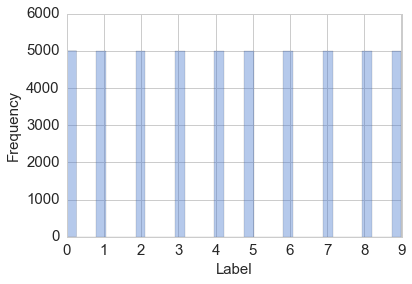

In [69]:
#Distribution of the training data
sns.distplot(Y_train,kde=False,rug=False,color='b')
plt.ylim(0,6000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
#plt.title('Distribution of Training Data',fontsize=15)

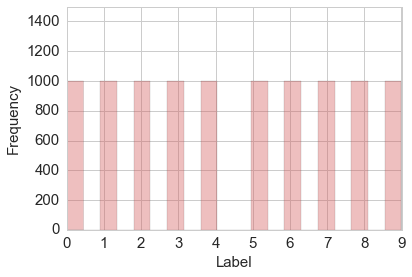

In [70]:
#Distribution of the test data
sns.distplot(Y_test,kde=False,rug=False,color='r')
plt.ylim(0,1500)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
#plt.title("Distribution of Test Data",fontsize=15)

In [71]:
from keras.utils import np_utils
nb_classes =10

#Change the target values into one-hot vectors 
y_train = np_utils.to_categorical(Y_train, nb_classes)
y_test = np_utils.to_categorical(Y_test, nb_classes)

# Import Deep Learning Library

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,MaxPooling2D,Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils
from keras.optimizers import SGD,Adam
from keras import backend as K
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot, plot

# General parameters for the CNN models

In [10]:
batch_size = 32
nb_classes = 10
nb_epoch = 20
#number of filters of cnn layer
nb_filters=32

# Model 1(1 Convolution layer and 2 Fully Connected layers)

In [55]:
model = Sequential()
model.add(Convolution2D(nb_filters,3,3,border_mode='same',input_shape=(3,32,32)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(output_dim=512,activation='relu'))
model.add(Dense(output_dim=nb_classes,input_dim=512))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])



In [13]:
#train the model
res = model.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 95s - loss: 1.4619 - acc: 0.4775 - val_loss: 1.2305 - val_acc: 0.5572
Epoch 2/20
50000/50000 [==============================] - 95s - loss: 1.1170 - acc: 0.6062 - val_loss: 1.0650 - val_acc: 0.6281
Epoch 3/20
50000/50000 [==============================] - 95s - loss: 0.9253 - acc: 0.6735 - val_loss: 1.1298 - val_acc: 0.6021
Epoch 4/20
50000/50000 [==============================] - 95s - loss: 0.7498 - acc: 0.7370 - val_loss: 1.0474 - val_acc: 0.6420
Epoch 5/20
50000/50000 [==============================] - 94s - loss: 0.5863 - acc: 0.7949 - val_loss: 1.1067 - val_acc: 0.6545
Epoch 6/20
50000/50000 [==============================] - 94s - loss: 0.4272 - acc: 0.8526 - val_loss: 1.1732 - val_acc: 0.6518
Epoch 7/20
50000/50000 [==============================] - 95s - loss: 0.2856 - acc: 0.9029 - val_loss: 1.2828 - val_acc: 0.6526
Epoch 8/20
50000/50000 [==============================

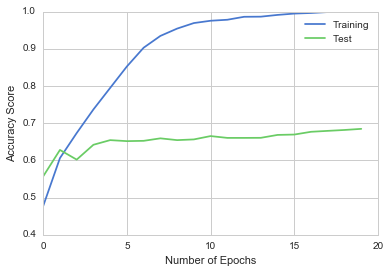

In [16]:
#Accuracy score of training and test data
x=range(nb_epoch)
plt.plot(x,res.history['acc'],label='Training')
plt.plot(x,res.history['val_acc'],label='Test')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')


# Model 2 3 Convolutional layers & 2 Fully connected layers

In [38]:
model2 = Sequential()
model2.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Flatten())
model2.add(Dense(output_dim=512,activation='relu'))
model2.add(Dense(output_dim=10,input_dim=512))
model2.add(Activation('softmax'))

#Optimization by adam
model2.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])



In [39]:
#train the model
res2 = model2.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 129s - loss: 1.3398 - acc: 0.5215 - val_loss: 1.0708 - val_acc: 0.6226
Epoch 2/20
50000/50000 [==============================] - 155s - loss: 0.9800 - acc: 0.6555 - val_loss: 0.9467 - val_acc: 0.6710
Epoch 3/20
50000/50000 [==============================] - 160s - loss: 0.8083 - acc: 0.7157 - val_loss: 0.9013 - val_acc: 0.6848
Epoch 4/20
50000/50000 [==============================] - 157s - loss: 0.6727 - acc: 0.7627 - val_loss: 0.8496 - val_acc: 0.7099
Epoch 5/20
50000/50000 [==============================] - 154s - loss: 0.5386 - acc: 0.8129 - val_loss: 0.8959 - val_acc: 0.7014
Epoch 6/20
50000/50000 [==============================] - 153s - loss: 0.4131 - acc: 0.8575 - val_loss: 0.8795 - val_acc: 0.7271
Epoch 7/20
50000/50000 [==============================] - 151s - loss: 0.2969 - acc: 0.8987 - val_loss: 1.0052 - val_acc: 0.7134
Epoch 8/20
50000/50000 [=======================

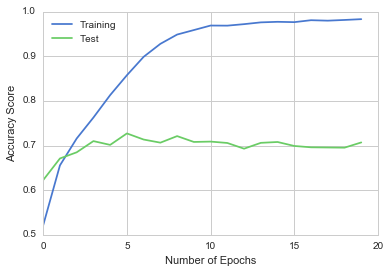

In [40]:
#Accuracy score of training and test data
x=range(nb_epoch)
plt.plot(x,res2.history['acc'],label='Training')
plt.plot(x,res2.history['val_acc'],label='Test')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')


# Model 3 3 Convolutional layers & 2 Fully connected layers

In [21]:
model3 = Sequential()
model3.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Convolution2D(32,3,3,border_mode='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Convolution2D(32,3,3,border_mode='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())
model3.add(Dense(output_dim=512,activation='relu'))
model3.add(Dense(output_dim=10,input_dim=512))
model3.add(Activation('softmax'))


model3.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])



In [22]:
#Train the model
res3 = model3.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 103s - loss: 1.4343 - acc: 0.4811 - val_loss: 1.1989 - val_acc: 0.5652
Epoch 2/20
50000/50000 [==============================] - 112s - loss: 1.0496 - acc: 0.6276 - val_loss: 0.9797 - val_acc: 0.6542
Epoch 3/20
50000/50000 [==============================] - 115s - loss: 0.8974 - acc: 0.6826 - val_loss: 0.9098 - val_acc: 0.6854
Epoch 4/20
50000/50000 [==============================] - 115s - loss: 0.7888 - acc: 0.7204 - val_loss: 0.8467 - val_acc: 0.7062
Epoch 5/20
50000/50000 [==============================] - 114s - loss: 0.7022 - acc: 0.7533 - val_loss: 0.8009 - val_acc: 0.7234
Epoch 6/20
50000/50000 [==============================] - 115s - loss: 0.6232 - acc: 0.7821 - val_loss: 0.8616 - val_acc: 0.7104
Epoch 7/20
50000/50000 [==============================] - 115s - loss: 0.5512 - acc: 0.8052 - val_loss: 0.8850 - val_acc: 0.7130
Epoch 8/20
50000/50000 [=======================

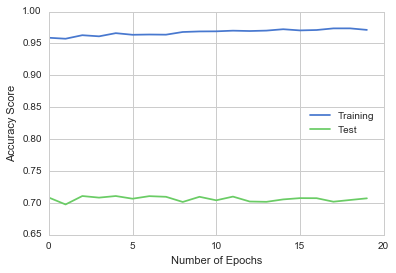

In [31]:
#Accuracy score of training and test data
x=range(nb_epoch)
plt.plot(x,res3.history['acc'],label='Training')
plt.plot(x,res3.history['val_acc'],label='Test')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')


# Model 4 (4 Convolutional layers and 2 Fully connected layers)

In [26]:
model4 = Sequential()
model4.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Convolution2D(64,3,3,border_mode='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Convolution2D(128,3,3,border_mode='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Convolution2D(128,3,3,border_mode='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

#model4.add(Convolution2D(32,3,3,border_mode='same'))
#model4.add(Activation('relu'))
#model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Flatten())
model4.add(Dense(output_dim=204,activation='relu'))
model4.add(Dense(output_dim=10,input_dim=128))
model4.add(Activation('softmax'))


model4.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])



In [27]:
#train the model
res4 = model4.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 179s - loss: 1.4202 - acc: 0.4796 - val_loss: 1.1356 - val_acc: 0.6018
Epoch 2/20
50000/50000 [==============================] - 182s - loss: 0.9770 - acc: 0.6554 - val_loss: 0.9345 - val_acc: 0.6694
Epoch 3/20
50000/50000 [==============================] - 182s - loss: 0.7982 - acc: 0.7199 - val_loss: 0.8154 - val_acc: 0.7164
Epoch 4/20
50000/50000 [==============================] - 181s - loss: 0.6744 - acc: 0.7617 - val_loss: 0.8524 - val_acc: 0.7150
Epoch 5/20
50000/50000 [==============================] - 181s - loss: 0.5785 - acc: 0.7990 - val_loss: 0.8427 - val_acc: 0.7192
Epoch 6/20
50000/50000 [==============================] - 181s - loss: 0.4980 - acc: 0.8254 - val_loss: 0.8186 - val_acc: 0.7276
Epoch 7/20
50000/50000 [==============================] - 182s - loss: 0.4211 - acc: 0.8516 - val_loss: 0.8724 - val_acc: 0.7279
Epoch 8/20
50000/50000 [=======================

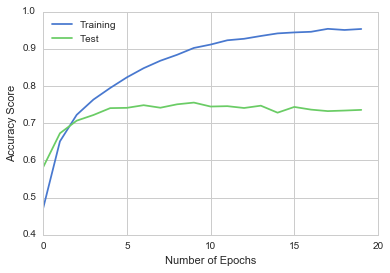

In [25]:
#Accuracy score of training and test data
x=range(nb_epoch)
plt.plot(x,res4.history['acc'],label='Training')
plt.plot(x,res4.history['val_acc'],label='Test')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')


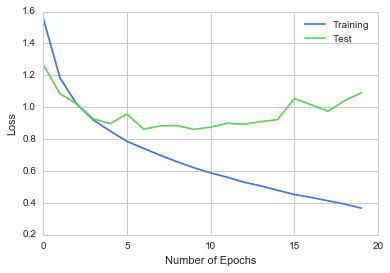

In [269]:
#Loss of training and test data
x=range(nb_epoch)
plt.plot(x,res4.history['loss'],label='Training')
plt.plot(x,res4.history['val_loss'],label='Test')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

# Model 5(Bayesian Optimization)

In [72]:
#Use early stopping not for overfitting
from keras.callbacks import EarlyStopping

#"num" is the  number of the first fully connected layer's dimension
#"lr" is the learning rate of the optimization(Adam)
def bo(num,num2,num3,num4):
    model5 = Sequential()
    model5.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
    model5.add(Activation('relu'))
    model5.add(MaxPooling2D(pool_size=(2,2)))

    model5.add(Convolution2D(int(num),3,3,border_mode='same'))
    model5.add(Activation('relu'))
    model5.add(MaxPooling2D(pool_size=(2,2)))

    model5.add(Convolution2D(int(num2),3,3,border_mode='same'))
    model5.add(Activation('relu'))
    model5.add(MaxPooling2D(pool_size=(2,2)))

    model5.add(Convolution2D(int(num3),3,3,border_mode='same'))
    model5.add(Activation('relu'))
    model5.add(MaxPooling2D(pool_size=(2,2)))
    
    model5.add(Flatten())
    model5.add(Dense(output_dim=int(num4),activation='relu'))
    model5.add(Dense(output_dim=10,input_dim=int(num4)))
    model5.add(Activation('softmax'))
    
    adam = Adam(lr=0.000597)
    
    #early stopping(monitoring validation loss. When the validation loss doesn't decrease for 2 consecutive epochs, it will stop training)
    early_stopping=EarlyStopping(monitor='val_loss', patience=2, verbose=0, mode='auto')
    model5.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    model5.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True,
              verbose=1,
              callbacks=[early_stopping])
    _,score = model5.evaluate(X_test, y_test, batch_size=batch_size,verbose=1)
    
    return score

In [73]:
#Baysesian Optimization
#Import library
from bayes_opt import BayesianOptimization

#The region of search
deep_opti=BayesianOptimization(bo,{'num':(8,256),'num2':(8,128),'num3':(8,128),'num4':(32,512)},verbose=1)
#parameters of bayesian optimization
#set gp_params as the sklearn's default parameters
gp_params = {"theta0": 0.1, "thetaL": None, "thetaU": None, "random_start": 1}
#set acquision function as the GP Upper Confidence Bound and kappa as 2.576 which is the reccomended parameter.
deep_opti.maximize(init_points=50, n_iter=30, acq='ucb', kappa=2.576,**gp_params)

#Result
print('Final Results')
#Show the best score
print('DEEP Bayes OPTI: %f' % deep_opti.res['max']['max_val'])


Initialization
-----------------------------------------------------------------------------
 Step |   Time |      Value |       num |      num2 |      num3 |      num4 | 
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 268s - loss: 1.4996 - acc: 0.4490 - val_loss: 1.2312 - val_acc: 0.5648
Epoch 2/20
50000/50000 [==============================] - 269s - loss: 1.0681 - acc: 0.6169 - val_loss: 0.9824 - val_acc: 0.6505
Epoch 3/20
50000/50000 [==============================] - 274s - loss: 0.8789 - acc: 0.6908 - val_loss: 0.8812 - val_acc: 0.6916
Epoch 4/20
50000/50000 [==============================] - 260s - loss: 0.7660 - acc: 0.7319 - val_loss: 0.8572 - val_acc: 0.7022
Epoch 5/20
50000/50000 [==============================] - 259s - loss: 0.6871 - acc: 0.7580 - val_loss: 0.8194 - val_acc: 0.7146
Epoch 6/20
50000/50000 [==============================] - 259s - loss: 0.6170 - acc: 0.7823 - val_loss: 0.7721 - val_acc: 0.7367
Epoc

In [74]:
#Show the best parameters
print('DEEP Bayes OPTI: %f' % deep_opti.res['max']['max_val'])
print( deep_opti.res['max']['max_params'])

DEEP Bayes OPTI: 0.762100
{'num4': 463.98750339480398, 'num': 125.97989401670969, 'num2': 81.121244013465855, 'num3': 101.13488578784879}


{'number of fully connected: 208.20818855609431, 'lr': 0.0010804657641849509, 'first cnn': 39.09439527874585, 'second cnn': 117.45631605717682}


    2 | 30m11s |    0.75700 |   69.6060 |   83.5942 |  126.2766
    
    
    
    DEEP Bayes OPTI: 0.764800
{'FC and Last CNN': 164.00827772477197, 'Second CNN': 117.71920423707829, 'Third CNN': 103.26538651174894}

# Final model(optimized parameters by bayesian optimization)

As for the "num", I set it 204 since the number should be integer.

In [29]:
model_opti2 = Sequential()
model_opti2.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
model_opti2.add(Activation('relu'))
model_opti2.add(MaxPooling2D(pool_size=(2,2)))

model_opti2.add(Convolution2D(118,3,3,border_mode='same'))
model_opti2.add(Activation('relu'))
model_opti2.add(MaxPooling2D(pool_size=(2,2)))

model_opti2.add(Convolution2D(103,3,3,border_mode='same'))
model_opti2.add(Activation('relu'))
model_opti2.add(MaxPooling2D(pool_size=(2,2)))

model_opti2.add(Convolution2D(164,3,3,border_mode='same'))
model_opti2.add(Activation('relu'))
model_opti2.add(MaxPooling2D(pool_size=(2,2)))
    
model_opti2.add(Flatten())
model_opti2.add(Dense(output_dim=164,activation='relu'))
model_opti2.add(Dense(output_dim=10,input_dim=164))
model_opti2.add(Activation('softmax'))
early_stopping=EarlyStopping(monitor='val_loss', patience=4, verbose=0, mode='auto')   
adam = Adam(lr= 0.000597)
   
    
model_opti2.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
res_opti2=model_opti2.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True,
             callbacks=[early_stopping])
_,score_opti2= model_opti2.evaluate(X_test, y_test, batch_size=batch_size,verbose=1)
    
print (score_opti2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 239s - loss: 1.4656 - acc: 0.4605 - val_loss: 1.1418 - val_acc: 0.5903
Epoch 2/20
50000/50000 [==============================] - 248s - loss: 1.0132 - acc: 0.6412 - val_loss: 0.9259 - val_acc: 0.6749
Epoch 3/20
50000/50000 [==============================] - 255s - loss: 0.8189 - acc: 0.7125 - val_loss: 0.8313 - val_acc: 0.7073
Epoch 4/20
50000/50000 [==============================] - 254s - loss: 0.6910 - acc: 0.7580 - val_loss: 0.8502 - val_acc: 0.6992
Epoch 5/20
50000/50000 [==============================] - 252s - loss: 0.5973 - acc: 0.7914 - val_loss: 0.7787 - val_acc: 0.7338
Epoch 6/20
50000/50000 [==============================] - 253s - loss: 0.5069 - acc: 0.8227 - val_loss: 0.7768 - val_acc: 0.7433
Epoch 7/20
50000/50000 [==============================] - 249s - loss: 0.4360 - acc: 0.8455 - val_loss: 0.7975 - val_acc: 0.7420
Epoch 8/20
50000/50000 [=======================

# Visualization

In [30]:
#Predicted classes for test data(The output is not one-hot vector, but the number between 0 to 9)
output=model_opti2.predict_classes( X_test, batch_size=batch_size, verbose=1)

10000/10000 [==============================] - 18s    


In [31]:
#Change the output above into one-hot vector
output_oh=np_utils.to_categorical(output, nb_classes)

In [32]:
#make the list of  index which is miss classified anf correctly classified
miss_classified=[]
correct=[]
for i in range(len(output_oh)):
    if not all(output_oh[i]==y_test[i]):
        miss_classified.append(i)
    else:
        correct.append(i)

In [33]:
#make a list of label which is miss classified
label_miss=[]
for miss in miss_classified:
   # print Y_test[miss]
    label_miss.append(Y_test[miss])
    
#make a list of label which is correctly classified    
label_correct=[]
for cor in correct:
    label_correct.append(Y_test[cor])

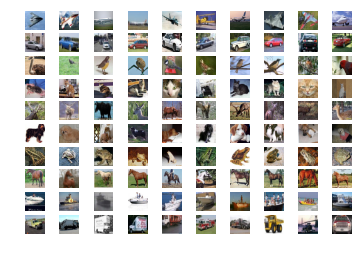

In [34]:
#Print the miss classified pictures
nclasses = 10
pos = 1
for i in range(nclasses):
    # Get the index list of class i image
    targets = np.where(Y_test == i)[0]
    #print targets
    np.random.shuffle(targets)
    # Print the first 10 pictures for each class
    for idx in targets[:10]:
        plt.subplot(10, 10, pos)
        img = X_test[idx]
        # (channel, row, column) => (row, column, channel)
        plt.imshow(img.reshape(3, 32, 32).transpose(1, 2, 0))
        plt.axis('off')
        pos += 1
plt.show()


(0, 9)

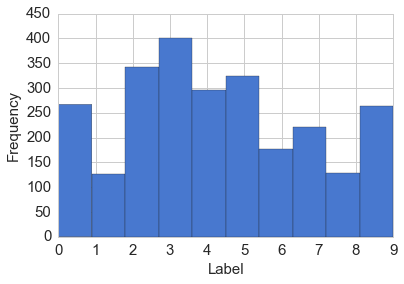

In [35]:
#Plot the distribution of miss classified data
plt.hist(label_miss)
#sns.distplot(label_miss,kde=False,rug=False,color='r')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xlim(0,9)

(0, 9)

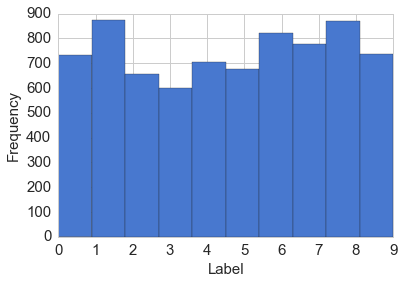

In [36]:
#Plot the distribution of the correctly classied data
plt.hist(label_correct)
#sns.distplot(label_miss,kde=False,rug=False,color='r')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xlim(0,9)

(0, 9)

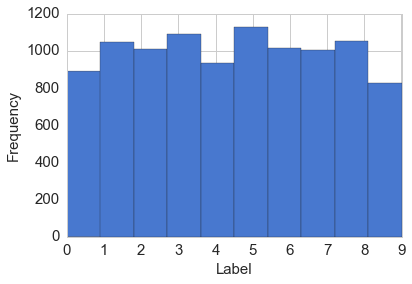

In [37]:
#Plot the distribution of the predicted data

plt.hist(output)
#sns.distplot(label_miss,kde=False,rug=False,color='r')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xlim(0,9)

In [38]:
#import library for making confusion matrix
from sklearn.metrics import confusion_matrix
#make confusion matrix
confusion_matrix(output,Y_test)

array([[733,  15,  49,   9,   9,   4,   3,  10,  30,  29],
       [ 19, 874,   4,   9,   3,   5,   1,   2,  25, 106],
       [ 70,  11, 658,  68,  64,  36,  46,  24,  23,  11],
       [ 30,   6,  68, 599,  63, 161,  65,  45,  23,  30],
       [ 13,   3,  60,  40, 704,  31,  18,  56,   4,   3],
       [ 15,   4,  66, 183,  58, 676,  28,  75,   5,  17],
       [ 15,   6,  46,  38,  37,  27, 823,   5,   7,  12],
       [ 11,   3,  36,  35,  51,  52,   9, 779,   5,  25],
       [ 75,  36,  11,   9,   9,   5,   6,   1, 872,  30],
       [ 19,  42,   2,  10,   2,   3,   1,   3,   6, 737]])

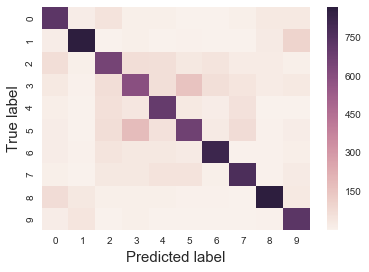

In [39]:
#make heatmap from the confusion matrix
sns.heatmap(confusion_matrix(output,Y_test))
plt.xlabel("Predicted label",fontsize=15)
plt.ylabel("True label",fontsize=15)

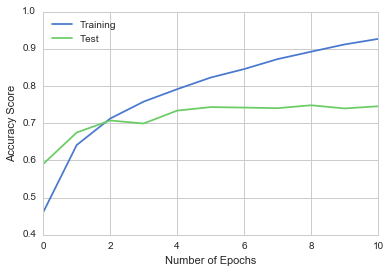

In [43]:
#Accuracy score for the training and test(Final model)

#number of epoch is 19 because of the early stopping
x=range(11)
plt.plot(x,res_opti2.history['acc'],label='Training')
plt.plot(x,res_opti2.history['val_acc'],label='Test')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')


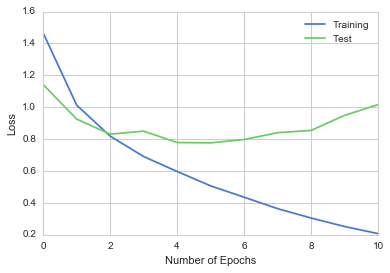

In [44]:
#Loss of training and test (Final model)

##number of epoch is 19 because of the early stopping
x=range(11)
plt.plot(x,res_opti2.history['loss'],label='Training')
plt.plot(x,res_opti2.history['val_loss'],label='Test')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')


# Validation

In [47]:
#make function of the benchmark model
def benchmark(X_train,X_test,y_train,y_test):
    model4 = Sequential()
    model4.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
    model4.add(Activation('relu'))
    model4.add(MaxPooling2D(pool_size=(2,2)))

    model4.add(Convolution2D(32,3,3,border_mode='same'))
    model4.add(Activation('relu'))
    model4.add(MaxPooling2D(pool_size=(2,2)))

    model4.add(Convolution2D(32,3,3,border_mode='same'))
    model4.add(Activation('relu'))
    model4.add(MaxPooling2D(pool_size=(2,2)))

    model4.add(Convolution2D(32,3,3,border_mode='same'))
    model4.add(Activation('relu'))
    model4.add(MaxPooling2D(pool_size=(2,2)))

    #model4.add(Convolution2D(32,3,3,border_mode='same'))
    #model4.add(Activation('relu'))
    #model4.add(MaxPooling2D(pool_size=(2,2)))

    model4.add(Flatten())
    model4.add(Dense(output_dim=512,activation='relu'))
    model4.add(Dense(output_dim=10,input_dim=512))
    model4.add(Activation('softmax'))


    model4.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
    #train the model
    res4 = model4.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)
    acc_benchmark.append(model4.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)[1])
    return acc_benchmark

In [48]:
#make function of the final model
def final_model(X_train,X_test,y_train,y_test):
    model_opti2 = Sequential()
    model_opti2.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
    model_opti2.add(Activation('relu'))
    model_opti2.add(MaxPooling2D(pool_size=(2,2)))

    model_opti2.add(Convolution2D(118,3,3,border_mode='same'))
    model_opti2.add(Activation('relu'))
    model_opti2.add(MaxPooling2D(pool_size=(2,2)))

    model_opti2.add(Convolution2D(103,3,3,border_mode='same'))
    model_opti2.add(Activation('relu'))
    model_opti2.add(MaxPooling2D(pool_size=(2,2)))

    model_opti2.add(Convolution2D(164,3,3,border_mode='same'))
    model_opti2.add(Activation('relu'))
    model_opti2.add(MaxPooling2D(pool_size=(2,2)))
    
    model_opti2.add(Flatten())
    model_opti2.add(Dense(output_dim=164,activation='relu'))
    model_opti2.add(Dense(output_dim=10,input_dim=164))
    model_opti2.add(Activation('softmax'))
    early_stopping=EarlyStopping(monitor='val_loss', patience=4, verbose=0, mode='auto')   
    adam = Adam(lr= 0.000597)
   
    
    model_opti2.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
    res_opti2=model_opti2.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True,
             callbacks=[early_stopping])
    acc_final.append(model_opti2.evaluate(X_test, y_test, batch_size=batch_size,verbose=1)[1])
    return acc_final

In [49]:
#import library for cross validation
from sklearn.cross_validation import StratifiedKFold

In [50]:
#load the data
X_train,X_test,Y_train,Y_test = load_cifar10("cifar-10-batches-py")

In [51]:
#Combine the training and test data
X=np.concatenate((X_train,X_test),axis=0)
X=np.vstack((X_train,X_test))
X=np.r_[X_train,X_test]

In [52]:
#Reshape the data
X= X.reshape((len(X),3,32,32))

In [53]:
#Combine the training and test data
Y=np.concatenate((Y_train,Y_test),axis=0)

In [54]:
#Split the combined data into 6 different dataset(Each dataset has the same distribution)
kf=StratifiedKFold(Y,n_folds=6,random_state=1)

In [55]:
#Accuracy score list
acc_benchmark=[]
acc_final=[]
count=0
nb_classes=10
for train_index,test_index in kf:
    X_train2,X_test2=X[train_index],X[test_index]
    if count==0:
        #Change Y into one-hot vector(the process is run only once)
        Y = np_utils.to_categorical(Y, nb_classes)
    Y_train2,Y_test2=Y[train_index],Y[test_index]
    benchmark(X_train2,X_test2,Y_train2,Y_test2)
    final_model(X_train2,X_test2,Y_train2,Y_test2)
    count+=1

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 129s - loss: 1.5285 - acc: 0.4366 - val_loss: 1.2669 - val_acc: 0.5406
Epoch 2/20
50000/50000 [==============================] - 117s - loss: 1.1697 - acc: 0.5778 - val_loss: 1.1219 - val_acc: 0.6065
Epoch 3/20
50000/50000 [==============================] - 125s - loss: 1.0080 - acc: 0.6418 - val_loss: 0.9509 - val_acc: 0.6597
Epoch 4/20
50000/50000 [==============================] - 126s - loss: 0.9089 - acc: 0.6777 - val_loss: 0.9490 - val_acc: 0.6647
Epoch 5/20
50000/50000 [==============================] - 128s - loss: 0.8350 - acc: 0.7035 - val_loss: 0.8798 - val_acc: 0.6885
Epoch 6/20
50000/50000 [==============================] - 129s - loss: 0.7753 - acc: 0.7247 - val_loss: 0.8970 - val_acc: 0.6854
Epoch 7/20
50000/50000 [==============================] - 125s - loss: 0.7307 - acc: 0.7382 - val_loss: 0.8301 - val_acc: 0.7107
Epoch 8/20
50000/50000 [=======================

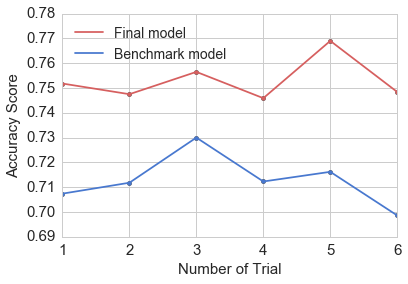

In [56]:
#Plot the accuracy score
plt.plot(range(1,7),acc_final,c="r",label="Final model")
plt.plot(range(1,7),acc_benchmark,c="b",label="Benchmark model")
plt.scatter(range(1,7),acc_final,c="r")
plt.scatter(range(1,7),acc_benchmark,c="b")
plt.xlim(1,6)
plt.xlabel("Number of Trial",fontsize=15)
plt.ylabel("Accuracy Score",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="best",fontsize=14)